In [154]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl

In [153]:
# read pickle to get a dataframe
dat = pkl.load(open("../../data/dico_IA.pkl", "rb"))
df = pd.DataFrame([(k, int(k.split("_")[1]), v) for k, v in dat.items()])
df.columns = ("File", "TrueValue", "PredValue")
df["CorrectCall"] = df["TrueValue"] == df["PredValue"]
df["IncorrectCall"] = df["TrueValue"] != df["PredValue"]
df.head()

,File,TrueValue,PredValue,CorrectCall,IncorrectCall
0,883590_6,6,6,True,False
1,872617_6,6,5,False,True
2,872093_6,6,6,True,False
3,991833_6,6,6,True,False
4,868348_6,6,7,False,True


In [152]:
res = df.pivot_table(values=["CorrectCall", "IncorrectCall"], index="TrueValue", aggfunc='sum')
res

,CorrectCall,IncorrectCall
TrueValue,,
1,0,1
3,0,7
4,0,10
5,14,40
6,72,34


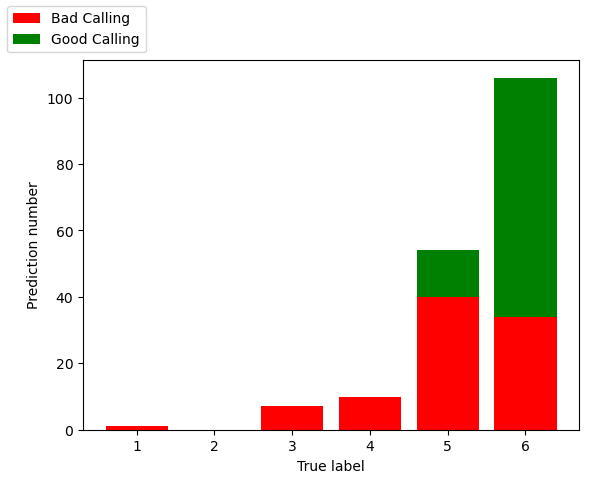

In [151]:
#matplotlib
fig, ax = plt.subplots()

ax.bar(x=res.index, height=res["IncorrectCall"], color="red", label="Bad Calling")
ax.bar(x=res.index, height=res["CorrectCall"], bottom=res["IncorrectCall"], color="green", label="Good Calling")

ax.set_xlabel("True label")
ax.set_ylabel("Prediction number")
fig.legend(loc = "upper left")